In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data_20 = pd.read_csv( 'data/Ref_Factor_20.csv')
data_48 = pd.read_csv( 'data/Ref_Factor_48.csv')
data_75 = pd.read_csv( 'data/Ref_Factor_75.csv')
data_95 = pd.read_csv( 'data/Ref_Factor_95.csv')
data_99 = pd.read_csv( 'data/Ref_Factor_99.csv')

In [26]:
data_20.head()

,Wvl,Raw Counts (Ref.),Rad. (Ref.),Raw Counts (Target),Rad. (Target),-log Reflect.,Reflect. %
0,346.2,4057,0.014423,2324,0.004131,0.54300,28.642
1,347.8,4480,0.015129,2556,0.004316,0.54475,28.527
2,349.4,5023,0.016641,2862,0.004741,0.54532,28.489
3,351.0,5347,0.017811,3040,0.005063,0.54627,28.427
4,352.6,5323,0.018716,3011,0.005293,0.54848,28.283


<function matplotlib.pyplot.show>

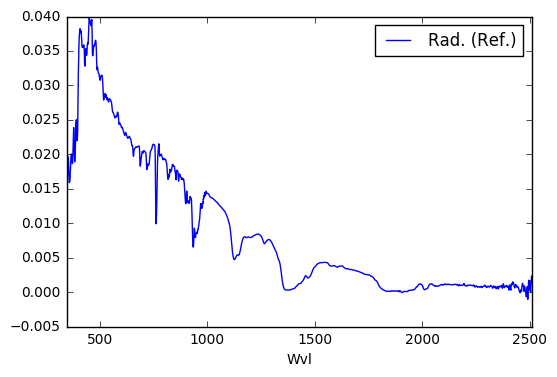

In [28]:
plt.figure()
data_20.plot( 'Wvl', 'Rad. (Ref.)')
plt.show

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).mean()


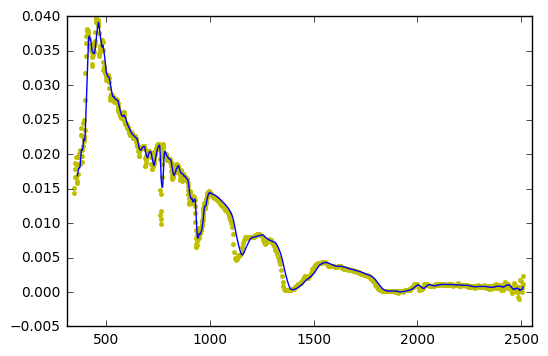

In [44]:
n = 11
plt.figure()
plt.plot(data_20['Wvl'], data_20['Rad. (Ref.)'], 'y.')
plt.plot(data_20['Wvl'], pd.rolling_mean(data_20['Rad. (Ref.)'], n), 'b-')

plt.axis([310, 2550, -0.005, 0.04])
plt.show()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).mean()
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).std()


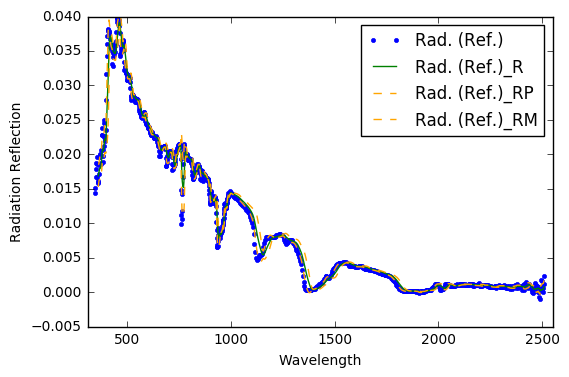

In [45]:
n = 11

data_20['Rad. (Ref.)_R'] = pd.rolling_mean(data_20['Rad. (Ref.)'], n)
std = pd.rolling_std(data_20['Rad. (Ref.)'],n)

data_20['Rad. (Ref.)_RP'] = data_20['Rad. (Ref.)_R'] + std
data_20['Rad. (Ref.)_RM'] = data_20['Rad. (Ref.)_R'] - std



fig,ax = plt.subplots()

ax.plot( data_20['Wvl'], data_20['Rad. (Ref.)'], color='blue',marker='.',linestyle='')
ax.plot( data_20['Wvl'], data_20['Rad. (Ref.)_R'], color='green',marker='',linestyle='-')
ax.plot( data_20['Wvl'], data_20['Rad. (Ref.)_RP'], color='orange',marker='',linestyle='--')
ax.plot( data_20['Wvl'], data_20['Rad. (Ref.)_RM'], color='orange',marker='',linestyle='--')

plt.legend()
plt.axis([310, 2550, -0.005, 0.04])
plt.xlabel('Wavelength')
plt.ylabel( 'Radiation Reflection')
plt.show()

In [48]:
data_20.corr()

,Wvl,Raw Counts (Ref.),Rad. (Ref.),Raw Counts (Target),Rad. (Target),-log Reflect.,Reflect. %,Rad. (Ref.)_R,Rad. (Ref.)_RP,Rad. (Ref.)_RM
Wvl,1.000000,-0.674934,-0.883942,-0.660905,-0.842790,-0.166537,0.195976,-0.890843,-0.893703,-0.883225
Raw Counts (Ref.),-0.674934,1.000000,0.875424,0.998232,0.899031,-0.006749,-0.079003,0.880790,0.873151,0.884378
Rad. (Ref.),-0.883942,0.875424,1.000000,0.869787,0.987723,0.081070,-0.143087,0.992672,0.992141,0.988133
Raw Counts (Target),-0.660905,0.998232,0.869787,1.000000,0.899758,-0.016452,-0.072902,0.873493,0.866669,0.876253
Rad. (Target),-0.842790,0.899031,0.987723,0.899758,1.000000,0.014563,-0.100237,0.978260,0.979208,0.972223
-log Reflect.,-0.166537,-0.006749,0.081070,-0.016452,0.014563,1.000000,-0.729036,0.084768,0.083713,0.085452
Reflect. %,0.195976,-0.079003,-0.143087,-0.072902,-0.100237,-0.729036,1.000000,-0.143518,-0.142651,-0.143702
Rad. (Ref.)_R,-0.890843,0.880790,0.992672,0.873493,0.978260,0.084768,-0.143518,1.000000,0.997654,0.997352
Rad. (Ref.)_RP,-0.893703,0.873151,0.992141,0.866669,0.979208,0.083713,-0.142651,0.997654,1.000000,0.990032
Rad. (Ref.)_RM,-0.883225,0.884378,0.988133,0.876253,0.972223,0.085452,-0.143702,0.997352,0.990032,1.000000


In [23]:
data_48.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7
0,Wvl,Raw Counts (Ref.),Rad. (Ref.),Raw Counts (Target),Rad. (Target),-log Reflect.,Reflect. %
1,346.2,3885,0.01381118,378,6.718950E-004,1.31293,4.865
2,347.8,4293,0.01449746,412,6.956620E-004,1.31889,4.799
3,349.4,4807,0.01592559,465,7.702725E-004,1.31545,4.837
4,351.0,5106,0.01700809,495,8.244225E-004,1.31451,4.847
